**Step 1: Importing all the necessary libraries**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

**Step 2: Importing the dataset**

In [155]:
# Load the dataset
customer = pd.read_csv('Customer Data.csv')
customer

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [156]:
#too display top 5 data
customer.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [157]:
#too display bottom 5 data
customer.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [158]:
#too display random 5 data
customer.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8055,C18273,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
3123,C13213,9753.114706,1.000000,10199.63,4585.44,5614.19,113.120409,1.000000,0.916667,1.000000,0.166667,2,131,15000.0,8292.653060,2296.958624,0.0,12
2476,C12550,96.699394,0.545455,1475.23,1475.23,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,14,4000.0,1595.023315,34.819015,0.0,12
4890,C15026,827.255067,1.000000,281.97,0.00,281.97,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,1000.0,298.808637,232.286208,0.0,12
8450,C18679,1237.423459,1.000000,650.00,650.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,419.182490,456.684218,0.0,12


In [159]:
#shape of dataset
customer.shape

(8950, 18)

**Step 3: Data Preprocessing**

In [160]:
#statistics summary for numerical columns
customer.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [161]:
#basic information about dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [162]:
#too check null values
customer.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


***Predictive imputation for MINIMUM_PAYMENTS***

In [163]:
customer["MINIMUM_PAYMENTS"]

,MINIMUM_PAYMENTS
0,139.509787
1,1072.340217
2,627.284787
3,NaN
4,244.791237
...,...
8945,48.886365
8946,NaN
8947,82.418369
8948,55.755628


In [164]:
# Separate rows with and without missing values
missing_data = customer[customer['MINIMUM_PAYMENTS'].isnull()]
non_missing_data = customer[customer['MINIMUM_PAYMENTS'].notnull()]

In [165]:
# Features to use for prediction
features = ['BALANCE', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'TENURE']

In [166]:
# Train-test split
X = non_missing_data[features] # Predictor variables
y = non_missing_data['MINIMUM_PAYMENTS'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into train and test sets

In [167]:
# Train RandomForestRegressor
model = RandomForestRegressor(random_state=42) # Calling the model
model.fit(X_train, y_train) #Fitting the model

RandomForestRegressor(random_state=42)

In [168]:
# Predict missing values
predicted_values = model.predict(missing_data[features])

In [169]:
# Fill missing values in the dataset with the predicted values
customer.loc[customer['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = predicted_values

In [170]:
# Scale numerical features
standardscaler = StandardScaler() # Calling StandardScaler
scaled_data = scaler.fit_transform(customer.select_dtypes(include=np.number)) # Scale numerical features

In [171]:
customer["MINIMUM_PAYMENTS"]

,MINIMUM_PAYMENTS
0,139.509787
1,1072.340217
2,627.284787
3,9111.164783
4,244.791237
...,...
8945,48.886365
8946,77.073452
8947,82.418369
8948,55.755628


In [172]:
customer.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [173]:
#drop all null values
customer.dropna(inplace = True)
customer.shape

(8949, 18)

In [174]:
customer.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Step 4: Exploratory Data Analysis**

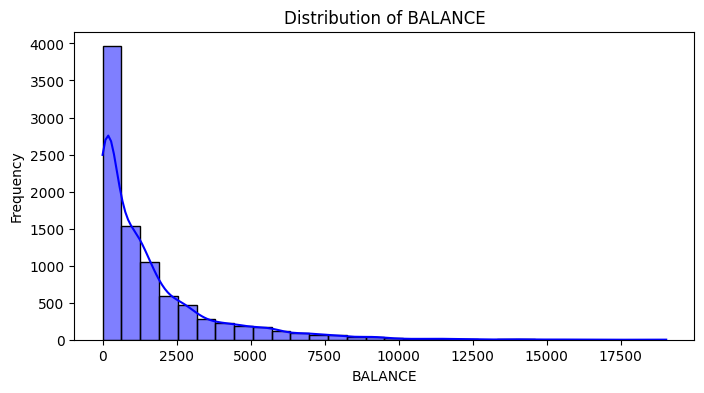

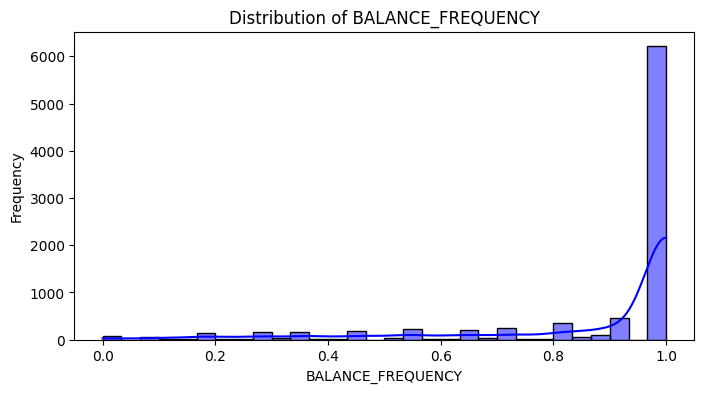

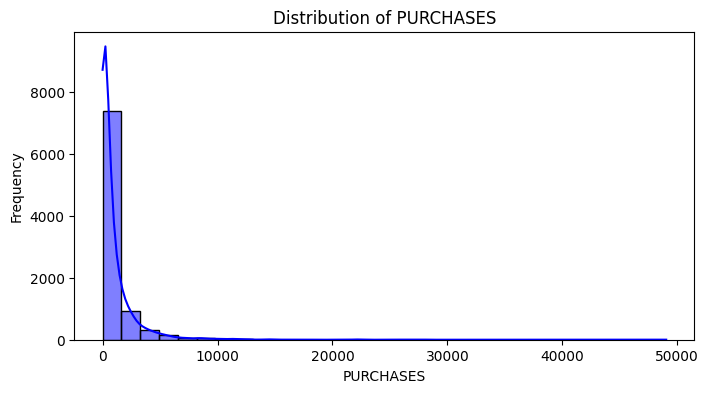

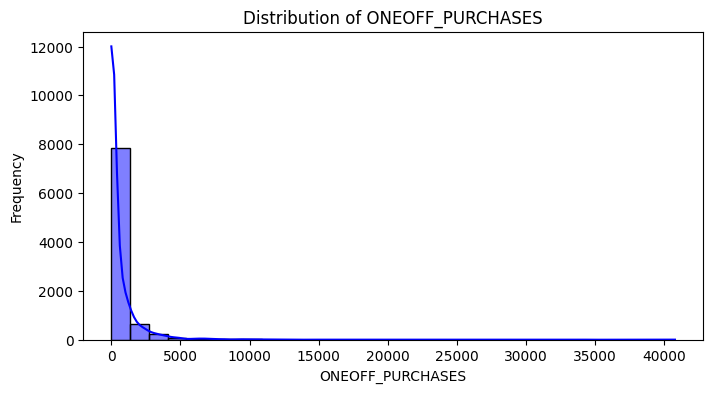

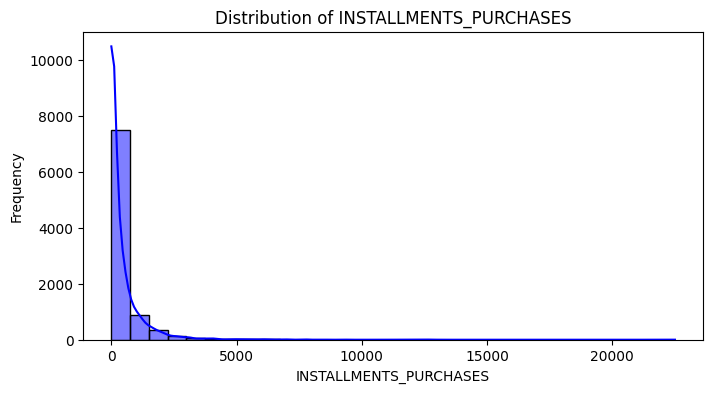

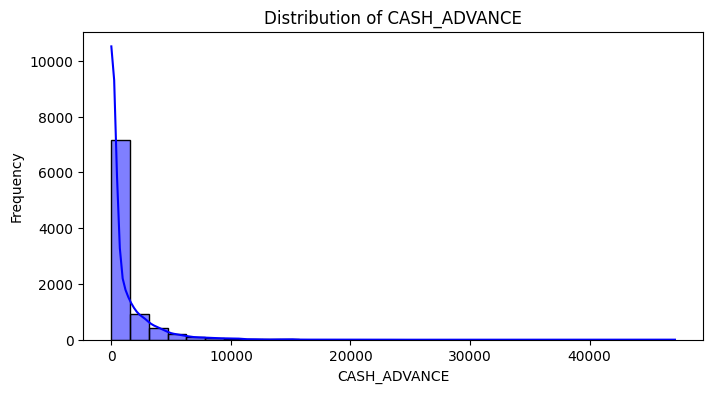

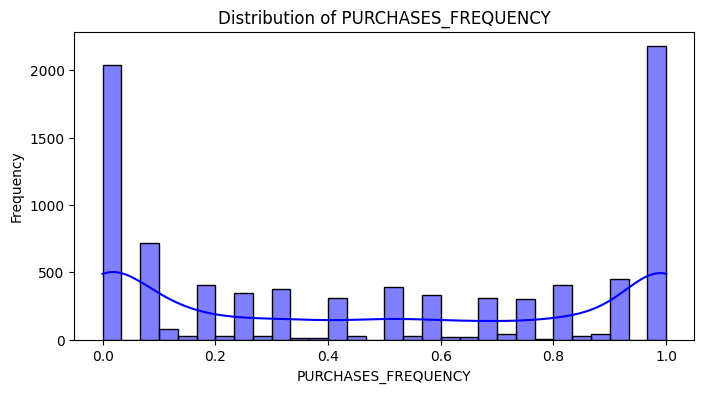

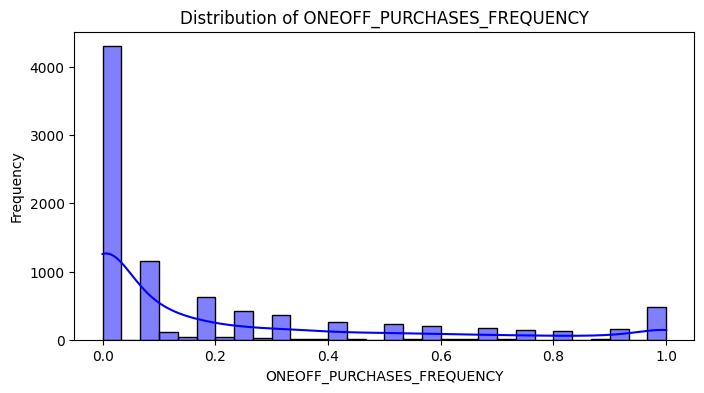

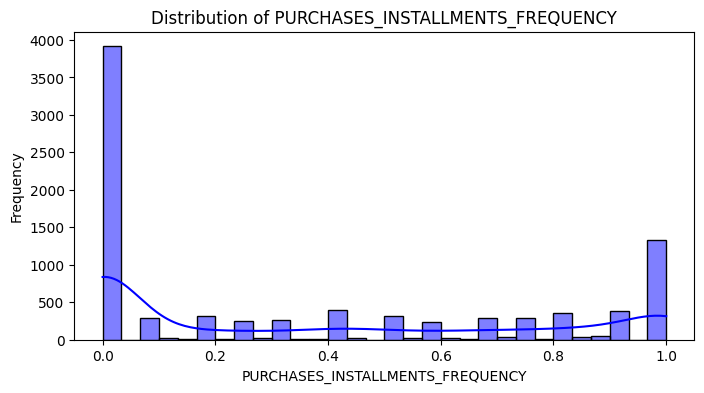

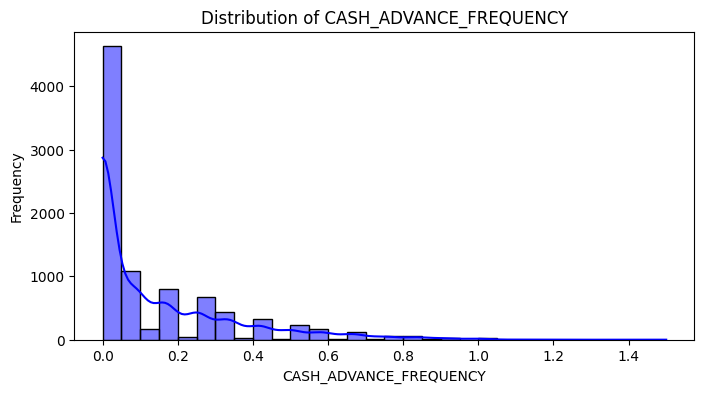

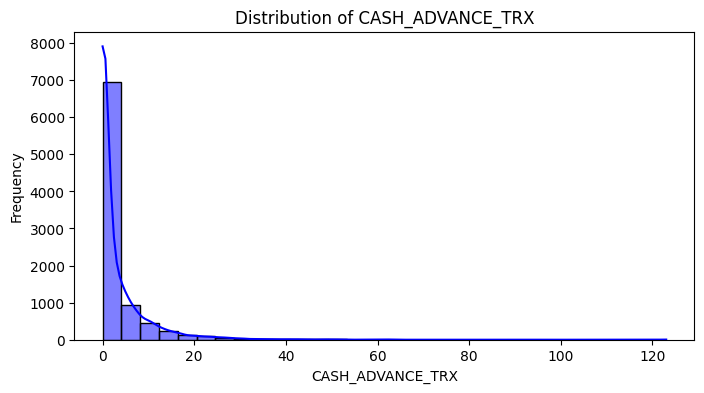

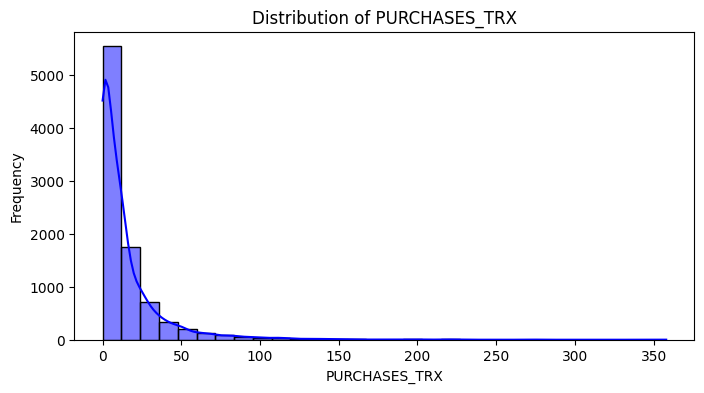

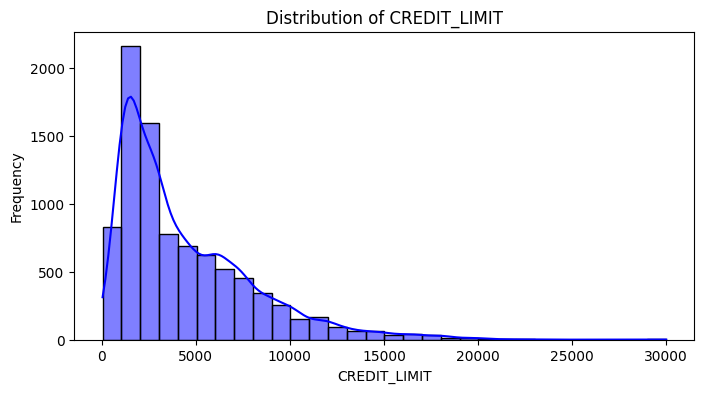

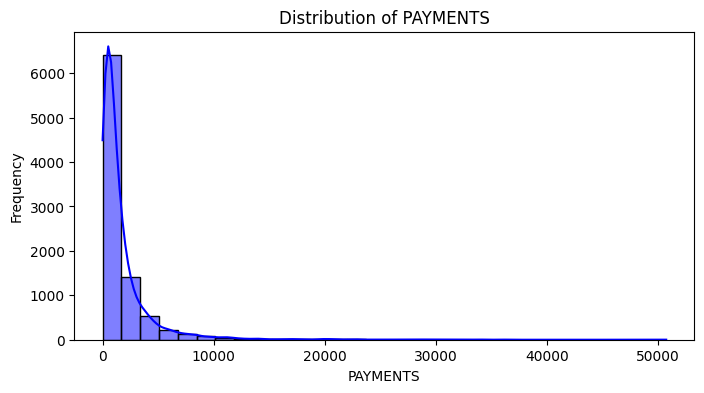

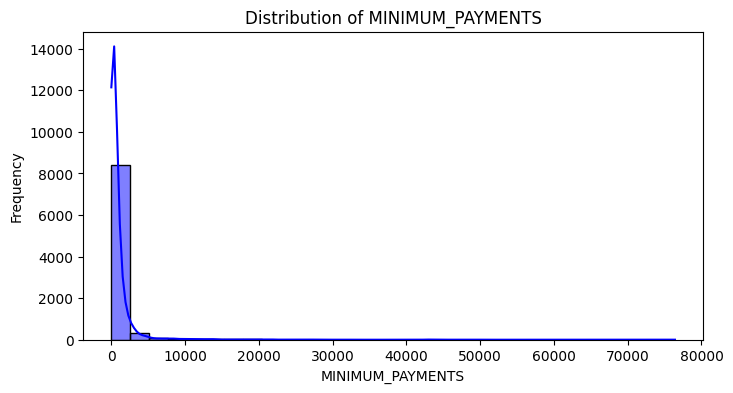

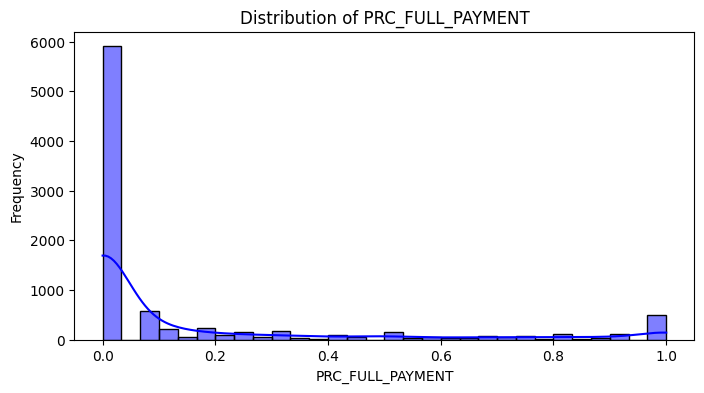

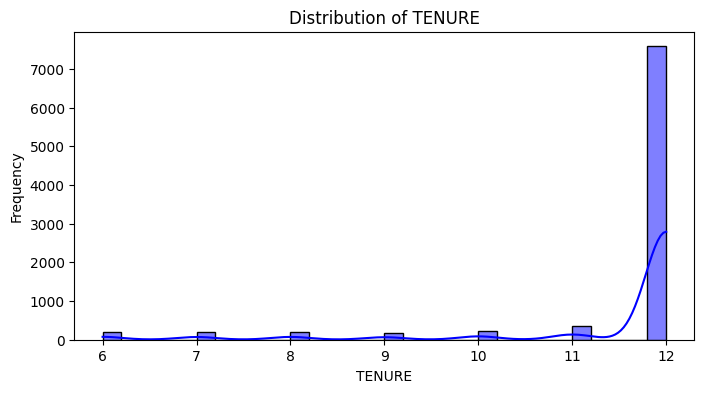

In [175]:
# Distribution of numerical features
numerical_features = customer.select_dtypes(include=np.number).columns  # Get numerical columns
for feature in numerical_features:  # Loop through each numerical feature
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.histplot(customer[feature], kde=True, bins=30, color='blue')  # Plot histogram with KDE overlay
    plt.title(f'Distribution of {feature}')  # Title of the plot
    plt.xlabel(feature)  # X-axis label as the feature name
    plt.ylabel('Frequency')  # Y-axis label as 'Frequency'
    plt.show()  # Display the plot

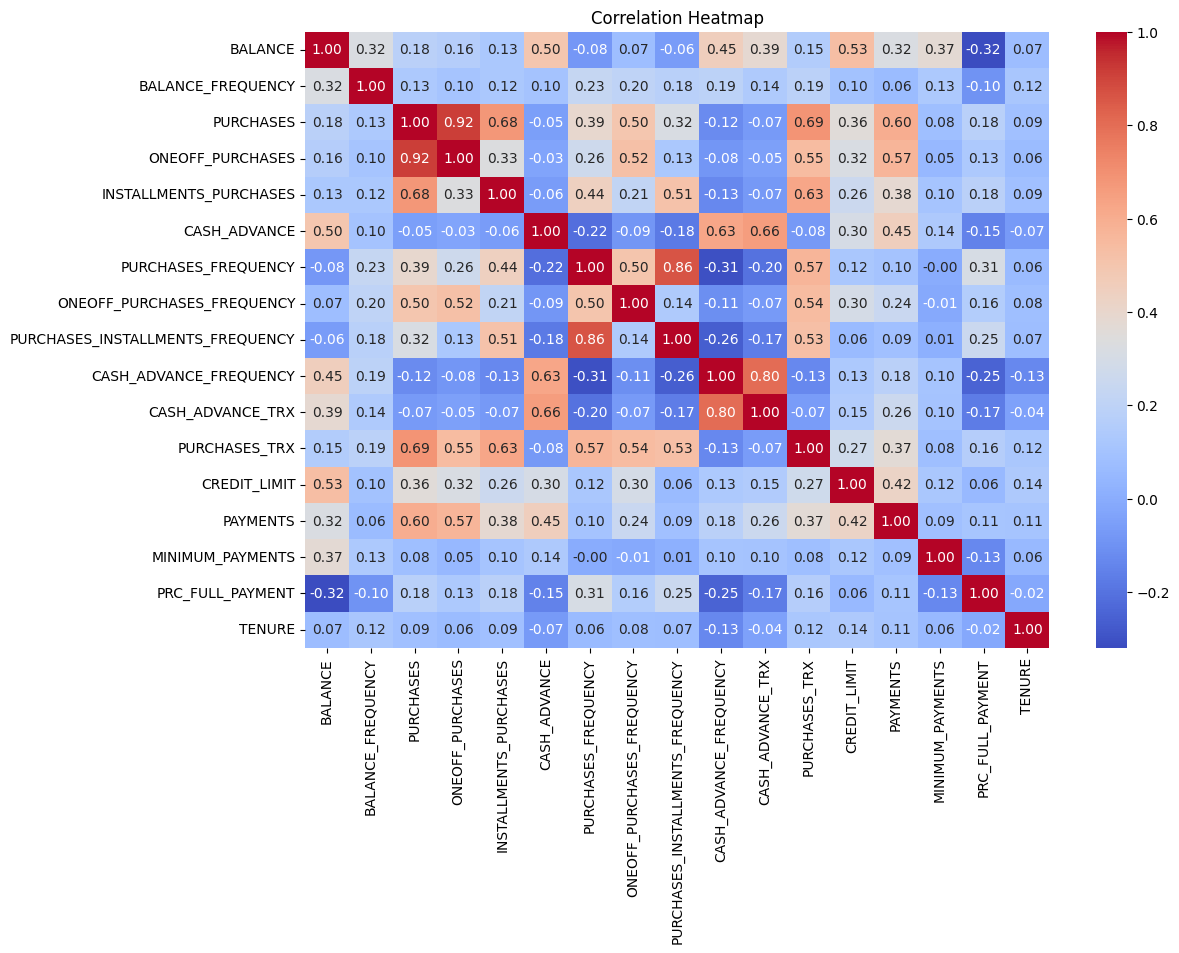

In [176]:
# Drop non-numeric columns
numeric_df = customer.select_dtypes(include=np.number) # Select only numeric columns from the DataFrame

# Plot a correlation heatmap for the numeric features
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
correlation_matrix = numeric_df.corr()  # Compute the correlation matrix of numeric features
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Plot the heatmap with annotations
plt.title('Correlation Heatmap')  # Add a title to the heatmap
plt.show()  # Display the plot


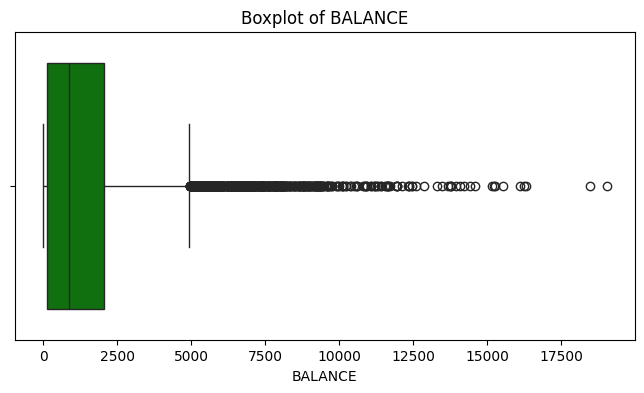

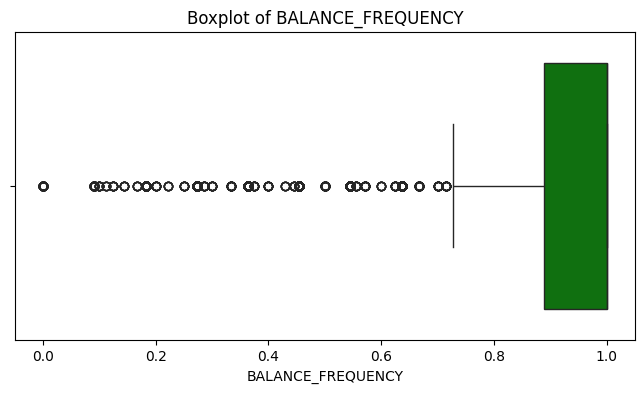

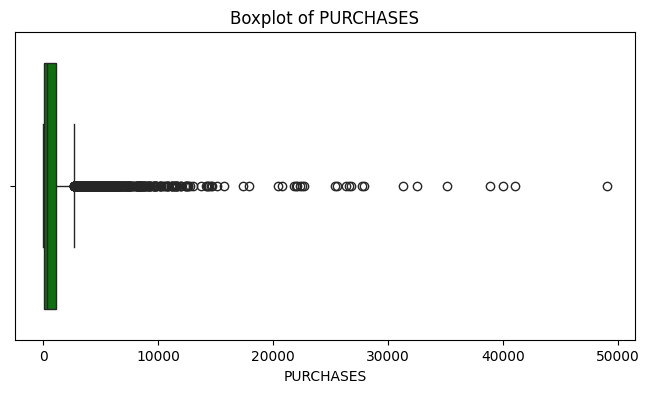

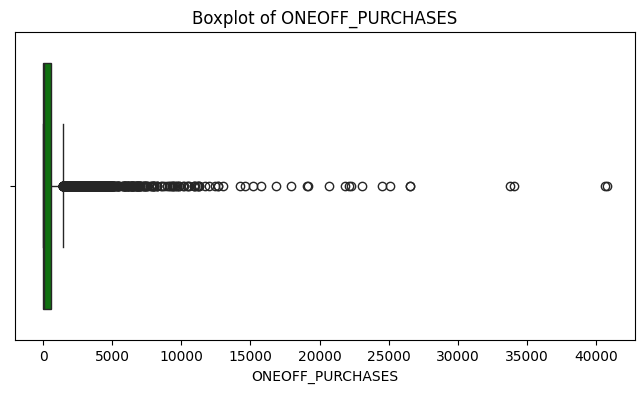

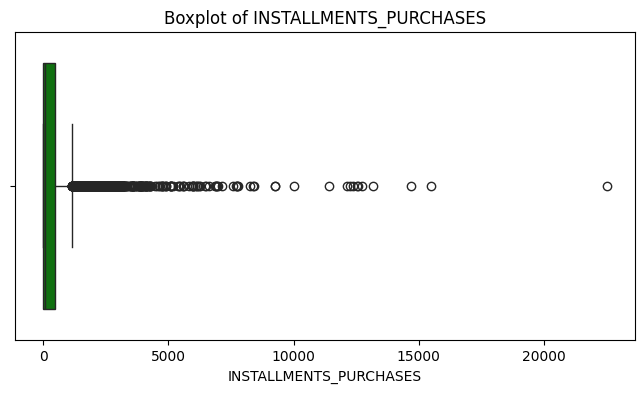

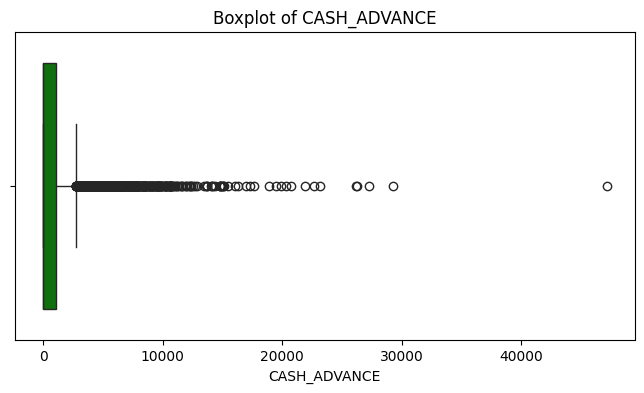

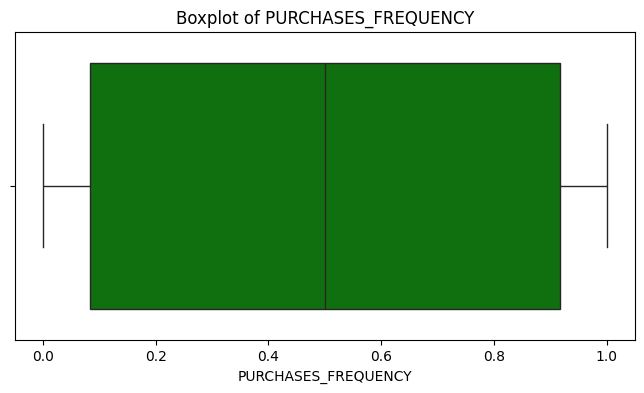

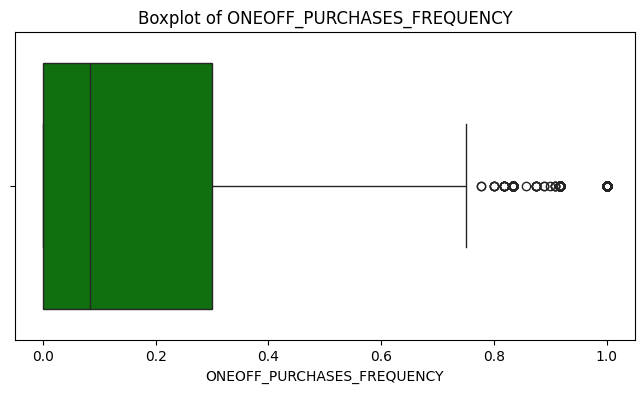

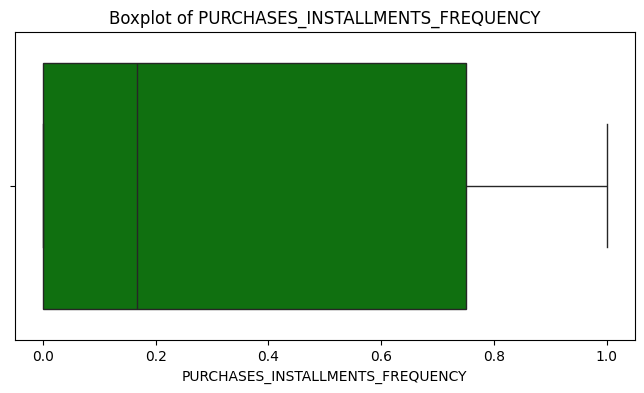

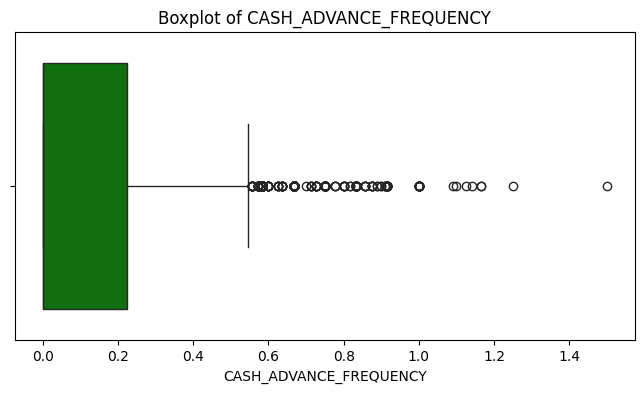

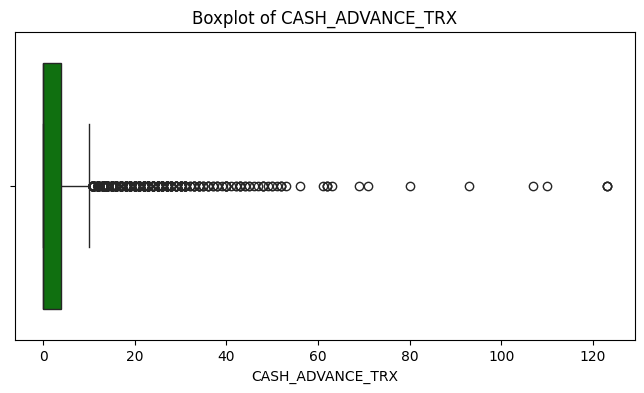

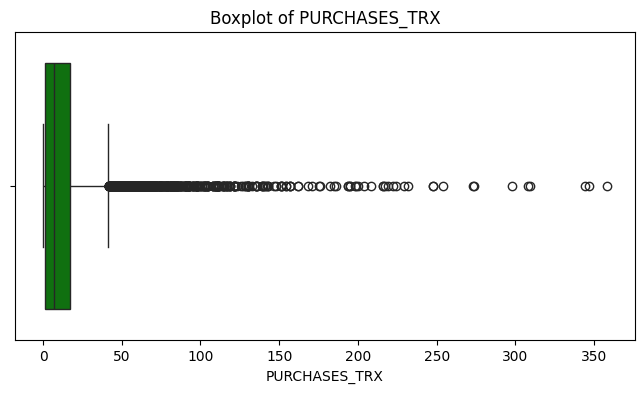

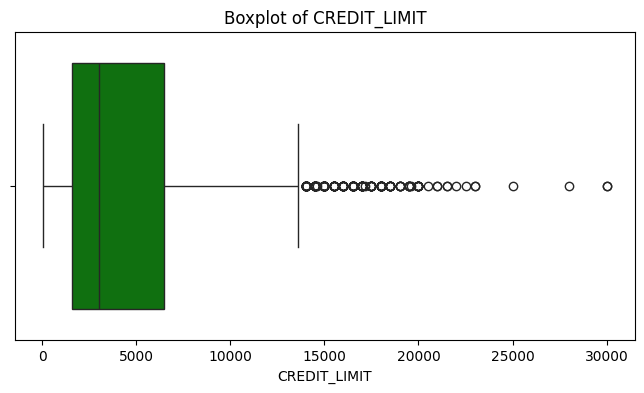

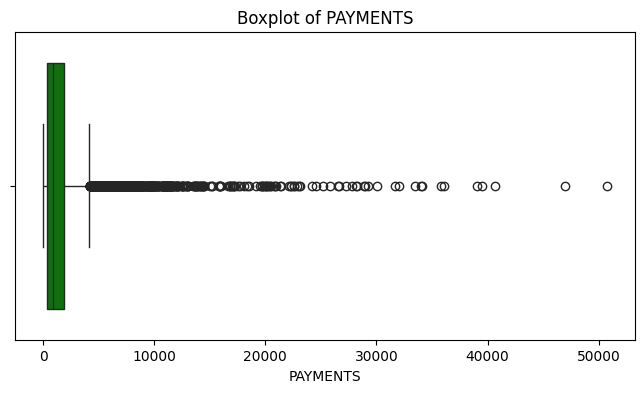

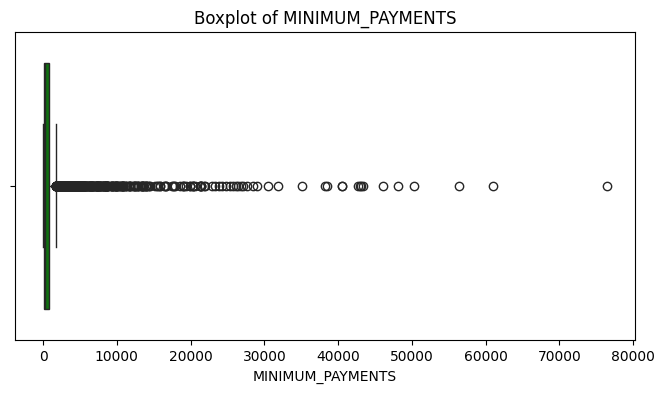

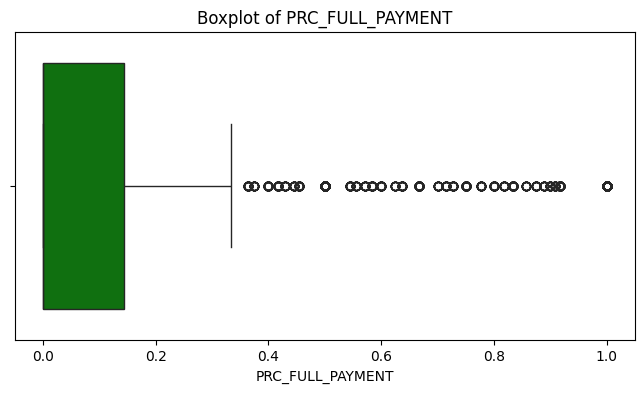

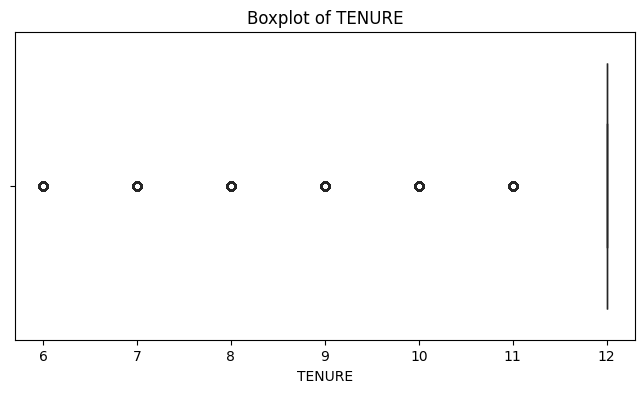

In [177]:
# Boxplots to check for outliers
for feature in numerical_features:  # Loop through each numerical feature
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.boxplot(x=customer[feature], color='green')  # Create a boxplot to check for outliers
    plt.title(f'Boxplot of {feature}')  # Title of the boxplot
    plt.xlabel(feature)  # X-axis label
    plt.show()  # Display the boxplot

**Step 5: Dimensionality Reduction**

*PCA(Principal Component Analysis)*

In [178]:
scaled_data_df = pd.DataFrame(scaled_data)  # Convert to DataFrame
print(scaled_data_df.isnull().sum())  # Check for missing values column-wise

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
dtype: int64


In [214]:
# PCA for reducing dimensions to 2 for visualization
scaled_data_dropped = scaled_data[:, ~np.isnan(scaled_data).any(axis=0)] # Remove columns with NaN values
pca = PCA(n_components=9)  # Specify 9 components for visualization
pca_data = pca.fit_transform(scaled_data_dropped)  # Apply PCA to the scaled data

In [215]:
import numpy as np
print(np.isnan(pca_data).sum())  # Total number of NaN values


0


In [216]:
# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Find the number of components needed for 90% variance
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of components needed to retain 90% variance: {n_components}")


Explained Variance Ratio: [0.28020564 0.20398978 0.09295001 0.07907205 0.0642064  0.05953805
 0.04899952 0.0410454  0.03433885]
Cumulative Explained Variance: [0.28020564 0.48419541 0.57714543 0.65621748 0.72042388 0.77996193
 0.82896145 0.87000685 0.9043457 ]
Number of components needed to retain 90% variance: 9


In [217]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for 9 Components:", explained_variance_ratio)

Explained Variance Ratio for 9 Components: [0.28020564 0.20398978 0.09295001 0.07907205 0.0642064  0.05953805
 0.04899952 0.0410454  0.03433885]


In [218]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.28020564 0.48419541 0.57714543 0.65621748 0.72042388 0.77996193
 0.82896145 0.87000685 0.9043457 ]


**Step 6: Model Selection**

*K-Means Clustering*

In [221]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Calling KMeans with 4 clusters
kmeans_labels = kmeans.fit_predict(pca_data)  # Apply KMeans clustering to the scaled data

In [222]:
kmeans.n_clusters

4

In [223]:
# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(pca_data, kmeans_labels)  # Compute silhouette score for K-Means
print(f"K-Means Silhouette Score: {silhouette_kmeans}")  # Display silhouette score for K-Means

K-Means Silhouette Score: 0.2331087745497955


In [224]:
# After fitting KMeans, access the centroids (which are in the PCA space)
reduced_centroids = kmeans.cluster_centers_

# Check the shape of the centroids
print(reduced_centroids.shape)  # Should output (4, 9) since there are 4 clusters and 9 components


(4, 9)


In [225]:
print(f"Number of clusters: {kmeans.n_clusters}")


Number of clusters: 4


In [226]:
print(f"Number of PCA components: {pca.n_components_}")


Number of PCA components: 9


In [227]:
# Example of labeling based on the centroid analysis (you would adjust this based on the actual values you observe)
cluster_labels = {
    0: "High Spenders",
    1: "Low Frequency Shoppers",
    2: "Occasional Shoppers",
    3: "Frequent Bargain Shoppers"
}

# Map the cluster labels to the clusters in the data
labels = [cluster_labels[label] for label in kmeans_labels]

# Add the cluster labels to the original data (optional)
customer_data_with_labels = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])
customer_data_with_labels['Cluster'] = labels
print(customer_data_with_labels.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.388718 -1.130264 -0.491658 -0.730393 -0.150517  0.308465 -0.466900   
1 -1.599636  2.129741 -0.571611  0.257450 -0.537851  0.936824  0.496275   
2  0.861437 -0.478005  0.089379 -1.254956  2.240466 -0.301233  0.667288   
3 -0.952932  0.142420 -0.639406 -2.234814 -1.598382 -0.859037  1.429900   
4 -1.364769 -0.737201 -0.353452 -1.098008  0.326582  0.282896 -0.289010   

        PC8       PC9                    Cluster  
0  0.207368 -0.112441        Occasional Shoppers  
1  0.488005  1.206024  Frequent Bargain Shoppers  
2 -1.098621  0.477861     Low Frequency Shoppers  
3 -0.645049 -0.740300        Occasional Shoppers  
4  0.694694  0.044061        Occasional Shoppers  


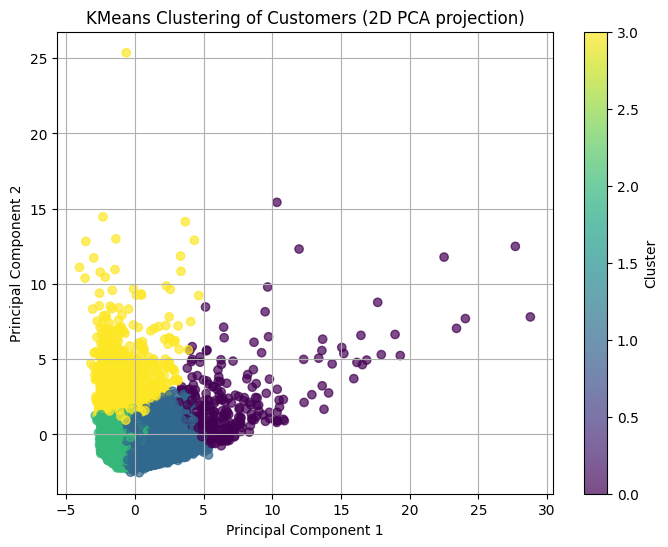

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot of the data points colored by their clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("KMeans Clustering of Customers (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [230]:
# Assuming the scaler was trained with 16 features, fit it again with the updated 17 features data
scaler = StandardScaler()
scaler.fit(scaled_data_dropped)  # 'updated_data' should have 17 features


StandardScaler()

In [231]:
import pandas as pd

# Assuming 'df' is your preprocessed dataframe
customer.to_csv("scaled_data_droped.csv", index=False)
from google.colab import files
files.download("scaled_data_droped.csv")  # Download locally


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [232]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, "kmeans_model.pkl")
files.download("kmeans_model.pkl")  # Download locally

# Save the trained KMeans model
joblib.dump(pca, "pca_model.pkl")
files.download("pca_model.pkl")  # Download locally

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
files.download("scaler.pkl")  # Download locally

# Save the standardscaler
joblib.dump(standardscaler, "standardscaler.pkl")
files.download("standardscaler.pkl")  # Download locally

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Creating new dataset for dashboard by adding new column of clusters ***

In [233]:
import pandas as pd
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your existing data
customer_data = pd.read_csv("Customer Data.csv")  # Replace with your actual file name

# Drop rows with NaN values (or handle them as per your requirements)
customer_data_cleaned = customer_data.dropna()

# Separate features (excluding CUST_ID and CASH_ADVANCE_FREQUENCY if needed)
features = customer_data_cleaned.drop(columns=["CUST_ID", "CASH_ADVANCE_FREQUENCY"])

# Scale the data (StandardScaler should be fitted to the training data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Train KMeans model with all 16 features
kmeans_model = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
kmeans_model.fit(scaled_data)

# Save the updated KMeans model and scaler
joblib.dump(kmeans_model, "kmeans_model_updated.pkl")
joblib.dump(scaler, "scaler_updated.pkl")

# Now you can use the updated model and scaler to make predictions on new data
print("Model and scaler have been retrained and saved.")


Model and scaler have been retrained and saved.


In [234]:
# Load the updated KMeans model and scaler
kmeans_model_updated = joblib.load("kmeans_model_updated.pkl")
scaler_updated = joblib.load("scaler_updated.pkl")

# Load your existing data
customer_data = pd.read_csv("Customer Data.csv")  # Replace with your actual file name

# Drop rows with NaN values (or handle them as per your requirements)
customer_data_cleaned = customer_data.dropna()

# Separate features (excluding CUST_ID and CASH_ADVANCE_FREQUENCY if needed)
features = customer_data_cleaned.drop(columns=["CUST_ID", "CASH_ADVANCE_FREQUENCY"])

# Scale the data using the updated scaler
scaled_data = scaler_updated.transform(features)

# Predict clusters using the updated KMeans model
predicted_labels = kmeans_model_updated.predict(scaled_data)

# Define the cluster labels (update as per your analysis)
cluster_labels = {
    0: "High Spenders",
    1: "Low Frequency Shoppers",
    2: "Occasional Shoppers",
    3: "Frequent Bargain Shoppers"
}

# Map the predicted cluster labels to the cluster types
customer_data_cleaned['Cluster_Type'] = [cluster_labels[label] for label in predicted_labels]

# Save the updated data to a new CSV file
customer_data_cleaned.to_csv("customer_data_with_cluster_type_updated.csv", index=False)


<ipython-input-234-eedfcfd74b74>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_cleaned['Cluster_Type'] = [cluster_labels[label] for label in predicted_labels]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,Occasional Shoppers
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,High Spenders
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,Low Frequency Shoppers
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,Occasional Shoppers
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,Occasional Shoppers
